# Perceptron Learning Algorithm（PLA）算法
## 1.调包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2.处理线性可分数据集
### 2.1.读取并可视化data1.csv

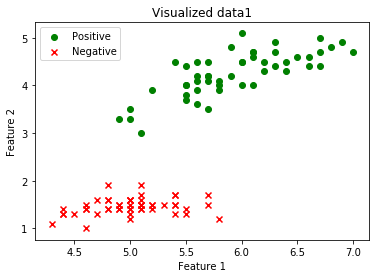

In [2]:
#由于data1中没有表头，所以header = None，默认是有header的
data1 = pd.read_csv("./data1.csv", header = None)
data1.columns = ['A', 'B', 'labels']
#数据中前50个是正例，后50个是反例
plt.scatter(data1['A'][0:50], data1['B'][0:50], color = 'g', marker = 'o')
plt.scatter(data1['A'][50:], data1['B'][50:], color = 'r', marker = 'x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualized data1')
plt.legend(('Positive', 'Negative'))

### 2.2.提取数据前两列为X，最后一列为Y

In [45]:
#reshape是为了防止出现类似size=(100，)的零秩矩阵
#X第一列为全1，和阈值相乘
X1 = np.hstack((np.array(data1['A']).reshape(-1, 1), np.array(data1['B']).reshape(-1, 1)))
X1 = np.hstack((np.ones((X1.shape[0], 1)), X1))
Y1 = np.array(data1['labels']).reshape(-1, 1)
print("X1.shape = {}, Y1.shape = {}".format(X1.shape, Y1.shape))

X1.shape = (100, 3), Y1.shape = (100, 1)


### 2.3.初始化W

In [46]:
def initializeW(numberOfFeatures):
    """
    根据特征数目初始化W为全零向量
    参数：
        numberOfFeatures -- 特征数
    返回：
        W -- 初始化后的W
    """
    #W的长度为特征数，定义为行向量
    W = np.zeros((1, numberOfFeatures))
    return W

W1 = initializeW(X1.shape[1])
print("W1.shape = {}".format(W1.shape))

W1.shape = (1, 3)


### 2.4.Cyclic PLA

In [71]:
def CyclicPLA(X, Y, W, stopLine = 1000):
    """
    Cyclic PLA算法，逐点检查，发现错误分类，立即改正。
    直到所有点分类正确或达到停止次数为止
    参数：
        X -- 点的特征数据集
        Y -- 点的标签数据集
        W -- 初始化线性参数
        stopLine -- 最大循环次数
    返回：
        W -- 校正后的W
        Corrected -- 是否分类正确
    """
    #循环周期
    Corrected = False
    for epoch in range(stopLine):
        #重置错误指标
        errorFlag = False
        #每个周期内遍历所有点
        for t in range(X.shape[0]):
            #X，W相乘得到分类结果
            classResult = np.dot(W, X[t:t+1, :].T)
            #若结果错误
            if (np.sign(classResult) != Y[t]):
                #修改错误指标
                if (False == errorFlag):
                    errorFlag = True
                #校正W = W + Xt*Yt
                W += (X[t:t+1, :] * Y[t])
        #如果一个周期内没有错误发生，则表明分类正确，跳出循环即可
        if (False == errorFlag):
            Corrected = True
            break
    return W, Corrected

### 2.5.训练W

In [72]:
W1, Corrected1 = CyclicPLA(X1, Y1, W1)
print("Corrected? {}".format(Corrected1))
print("W1 = {}".format(W1))
print("W1.shape = {}".format(W1.shape))

Corrected? True
W1 = [[-2.  -3.5  9.2]]
W1.shape = (1, 3)


### 2.6.绘制结果

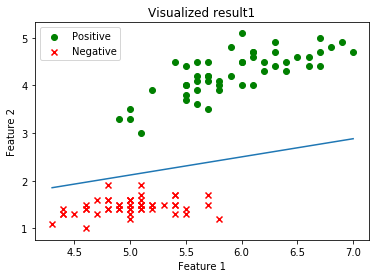

In [73]:
#数据中前50个是正例，后50个是反例
plt.scatter(data1['A'][0:50], data1['B'][0:50], color = 'g', marker = 'o')
plt.scatter(data1['A'][50:], data1['B'][50:], color = 'r', marker = 'x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualized result1')
plt.legend(('Positive', 'Negative'))
#求x1的范围
x1min = np.amin(data1['A'])
x1max = np.amax(data1['A'])
#画图
x1 = np.array([x1min, x1max])
x2 = -(x1 * W[0, 1] + W[0, 0]) / W[0, 2]
plt.plot(x1, x2)

## 3.处理线性不可分数据集
### 3.1.读取数据

In [42]:
data2 = pd.read_csv("./data2.csv", header = None)
data2.columns = ['A', 'B', 'labels']

### 3.2.可视化data2

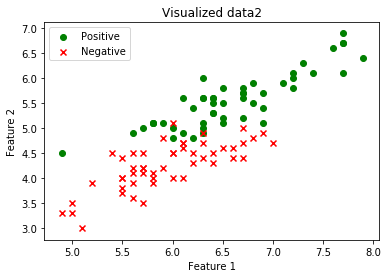

In [43]:
#数据中前50个是正例，后50个是反例
plt.scatter(data2['A'][0:50], data2['B'][0:50], color = 'g', marker = 'o')
plt.scatter(data2['A'][50:], data2['B'][50:], color = 'r', marker = 'x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualized data2')
plt.legend(('Positive', 'Negative'))

### 3.3.提取数据

In [107]:
#reshape是为了防止出现类似size=(100，)的零秩矩阵
X2 = np.hstack((np.array(data2['A']).reshape(-1, 1), np.array(data2['B']).reshape(-1, 1)))
X2 = np.hstack((np.ones((X2.shape[0], 1)), X2))
Y2 = np.array(data1['labels']).reshape(-1, 1)
print("X2.shape = {}, Y2.shape = {}".format(X2.shape, Y2.shape))

X2.shape = (100, 3), Y2.shape = (100, 1)


### 3.4.初始化W2

In [132]:
W2 = initializeW(X2.shape[1])
print("W2 = {}".format(W2))

W2 = [[ 0.  0.  0.]]


### 3.5.Packet PLA

In [136]:
def CorrectPoint(X, Y, W):
    """
    统计正确分类点数
    参数：
        X -- 点的特征数据集
        Y -- 点的标签数据集
        W -- 初始化线性参数
    返回：
        numberOfPoint -- 正确分类点数
    """
    #计算分类结果
    result = np.sign(np.dot(X, W.T))
    #统计正确点个数
    numberOfPoint = np.sum(result == Y)
    return numberOfPoint


def PacketPLA(X, Y, W, differGate = 0.01, stopLine = 1000):
    """
    Packet PLA，用于处理非线性可分的数据集
    W更新方式和Cyclic PLA相同，但每次更新后应和更新前对比，取错误划分点数少的W
    两次更新前后W差异度低于differGate，或迭代次数达到次数限制后，停止迭代
    参数：
        X -- 点的特征数据集
        Y -- 点的标签数据集
        W -- 初始化线性参数
        differGate -- 差异度门限
        stopLine -- 最大循环次数
    返回：
        W -- 校正后的W
        Converged -- 是否收敛
    """
    #收敛标志初始化为否
    Converged = False
    #循环周期
    for epoch in range(stopLine):
        #假如收敛了，结束循环
        if (Converged):
            break
        else:
            #对于每个数据
            for t in range(X.shape[0]):
                #计算分类结果
                classResult = np.dot(W, X[t:t+1, :].T)
                #若分类不正确
                if (np.sign(classResult) != Y[t]):
                    #执行修正，并存在缓存中
                    WCorrected = W + X[t:t+1, :] * Y[t]
                    #计算差异度
                    difference = np.linalg.norm(W - WCorrected) / (np.linalg.norm(W) + np.linalg.norm(WCorrected))
                    #若差异足够小
                    if (difference < differGate):
                        #标记为收敛
                        Converged = True
                        break
                    #若差异不够小
                    else:
                        #计算正确分类点个数
                        pointPrev = CorrectPoint(X, Y, W)
                        pointCorrected = CorrectPoint(X, Y, WCorrected)
                        #如果校正的正确点数多，就取校正后的W；反之，W不变
                        if (pointPrev <= pointCorrected):
                            W = WCorrected
                        else: pass
                        #print(W)
                else:pass
    return W, Converged

### 3.6.训练W2

In [147]:
#先用Cyclic PLA预热100次
W2, Corrected2 = CyclicPLA(X2, Y2, W2, stopLine = 100)
print("是否正确？{}".format(Corrected2))
print("W2 = {}".format(W2))
print("正确点个数 = {}".format(CorrectPoint(X2, Y2, W2)))
#再用Packet PLA
W2, Converged2 = PacketPLA(X2, Y2, W2, stopLine = 50000)
print("是否收敛? {}".format(Converged2))
print("W2 = {}".format(W2))
print("正确点个数 = {}".format(CorrectPoint(X2, Y2, W2)))

是否正确？False
W2 = [[-181.  -153.2  204.2]]
正确点个数 = 57
是否收敛? False
W2 = [[-179.  -140.9  214.4]]
正确点个数 = 92


### 3.7. 绘制结果

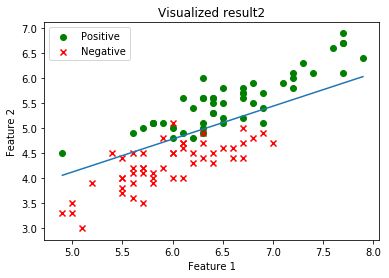

In [148]:
#数据中前50个是正例，后50个是反例
plt.scatter(data2['A'][0:50], data2['B'][0:50], color = 'g', marker = 'o')
plt.scatter(data2['A'][50:], data2['B'][50:], color = 'r', marker = 'x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualized result2')
plt.legend(('Positive', 'Negative'))
#求x1的范围
x1min = np.amin(data2['A'])
x1max = np.amax(data2['A'])
#画图
x1 = np.array([x1min, x1max])
x2 = -(x1 * W2[0, 1] + W2[0, 0]) / W2[0, 2]
plt.plot(x1, x2)